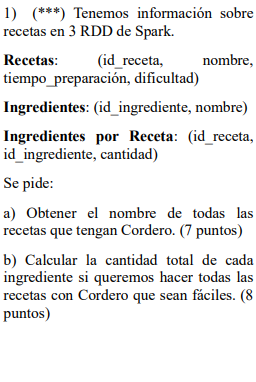

In [ ]:
#Recetas: (id_receta, nombre, tiempo_preparación, dificultad)


#Ingredientes: (id_ingrediente, nombre)


#Ingredientes por Receta: (id_receta, id_ingrediente, cantidad)



In [ ]:
rdd1= sc.parallelize(data1)

rdd2= sc.parallelize(data2)

rdd3= sc.parallelize(data3)

In [ ]:
rdd2 = rdd2.filter(lambda x: x[1]=="Cordero" )

In [ ]:
rdd3_a = rdd3.map(lambda x: (x[0],x[1]) )
# id_ingrediente, id_receta

In [ ]:
corderos = rdd2.join(rdd3_a)
# id_ingrediente, (nombre,id_receta)

In [ ]:
corderos.map(lambda x: (x[1][1],x[0]))
# id_receta,  id_ingrediente

In [ ]:
rdd1 = rdd1.map(lambda x: (x[0],x[1]))
# id_receta,  nombre receta

In [ ]:
recetas_con_cordero = rdd1.join(corderos)
#id_receta, (nombre_receta,id_ingrediente)

In [ ]:
recetas_con_cordero = recetas_con_cordero.map(lambda x: x[1][0])
#nombres

In [ ]:
faciles = rdd1.filter(lambda x: x[3]=="Facil")
faciles = faciles.map(lambda x: (x[0],1))
# id_receta, 1

In [ ]:
rdd3_b = rdd3.map(lambda x: (x[0],(x[1],x[2])))
# id_receta, (id_ingrediente, cantidad)

In [ ]:
recetas_faciles = rdd3_b.join(faciles)
# id_receta, ((id_ingrediente, cantidad),1)

In [ ]:
recetas_faciles = recetas_faciles.map(lambda x: (x[1][0][0],(x[0],x[1][0][1]))  )
# id_ingrediente, (id_receta, cantidad)

In [ ]:
result = recetas_faciles.join(rdd2)
# id_ingrediente, ((id_receta, cantidad), cordero)

In [ ]:
result = result.map(lambda x: (x[1][0][0],x[0]))
# id_receta, id_ingr

In [ ]:
recetas_faciles = recetas_faciles.map(lambda x: (x[1][0],(x[0],x[1][1]))  )
# id_receta, (id_ingrediente, cantidad)

In [ ]:
recetas_faciles = recetas_faciles.join(result)
# id_receta, ((id_ingrediente, cantidad),id_ing)

In [ ]:
recetas_faciles = recetas_faciles.map(lambda x: ( (x[1][0][0],x[1][0][1] ) )
# id_ing, cant

In [ ]:
recetas_faciles.reduceByKey(lambda x,y: x+y)